In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Analyze selection

In [12]:
from deal.utils import load_dataframe

colvar_path = f'../colvar/COLVAR'
colvar = load_dataframe(colvar_path)

In [16]:
from ase.io import read

deal_thresholds = [0.05,0.1,0.15,0.2]

for threshold in deal_thresholds:
    try:
        traj_path = f'deal_{threshold}_selected.xyz'
        traj = read(traj_path,index=":")
        # create  column with the selections
        frames = [atoms.info['frame'] for atoms in traj]
        selected = np.zeros(len(colvar))
        for i in range(len(colvar)):
            if i in frames:
                selected[i] = 1
        colvar[f'selection_{threshold}'] = selected
    except Exception as e:
        print(e)
        


[Errno 2] No such file or directory: 'deal_0.05_selected.xyz'
[Errno 2] No such file or directory: 'deal_0.1_selected.xyz'


In [19]:
colvar

,time,coord_Cu-O,coord_Cu-C,coord_Cu-H,coord_O-C,coord_O-H,coord_C-H,walker,selection_0.15,selection_0.2
0,0.0,8.070808,3.552185,0.383616,1.894100,0.211363,0.881402,0,1.0,1.0
1,1.0,8.039236,3.566484,0.377221,1.897701,0.209903,0.872477,0,0.0,0.0
2,2.0,7.798310,3.403923,0.343239,1.923037,0.243716,0.875180,0,1.0,1.0
3,3.0,7.699648,2.980010,0.322881,1.904418,0.259342,0.935434,0,1.0,1.0
4,4.0,7.455785,3.062375,0.268977,1.911140,0.191305,0.824842,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6850,6850.0,1.566462,0.843713,3.120248,1.942891,0.012761,0.007746,0,0.0,0.0
6851,6851.0,1.577696,0.840599,3.032603,1.944891,0.014073,0.008622,0,0.0,0.0
6852,6852.0,1.581854,0.850779,2.927711,1.946762,0.015896,0.010222,0,0.0,0.0
6853,6853.0,1.580080,0.873549,2.832087,1.947831,0.017615,0.012412,0,0.0,0.0


View selected frames along trajectory. In this example we have not shuffled the data so most of the points are collected at the beginning.

/leonardo/pub/userexternal/lbonati1/envs/deal/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='time', ylabel='coord_Cu-H'>

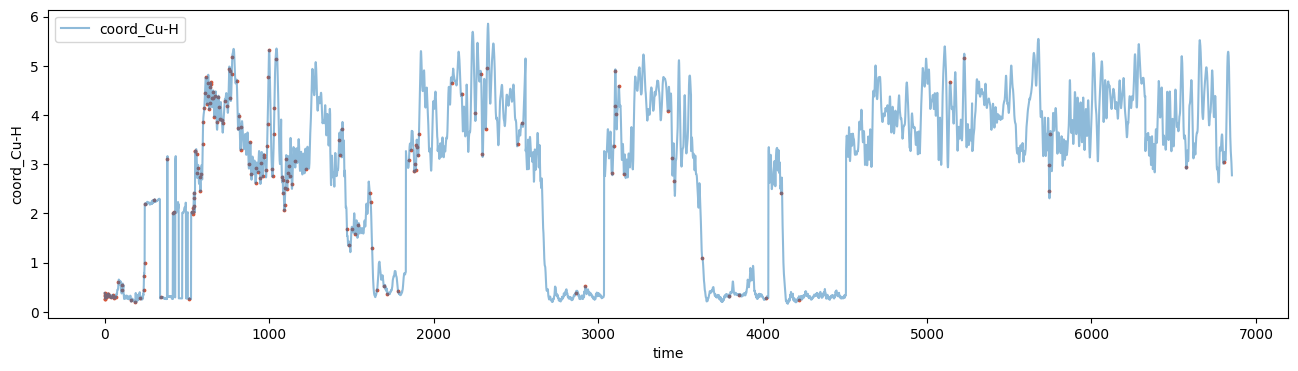

In [78]:
threshold = 0.15
sel = colvar[f'selection_{threshold}']==1

fig,ax= plt.subplots(figsize=(16,4))
colvar.plot('time','coord_Cu-H',alpha=0.5,ax=ax)
colvar[sel].plot.scatter('time','coord_Cu-H',c='fessa6',s=3,ax=ax,cmap='fessa')

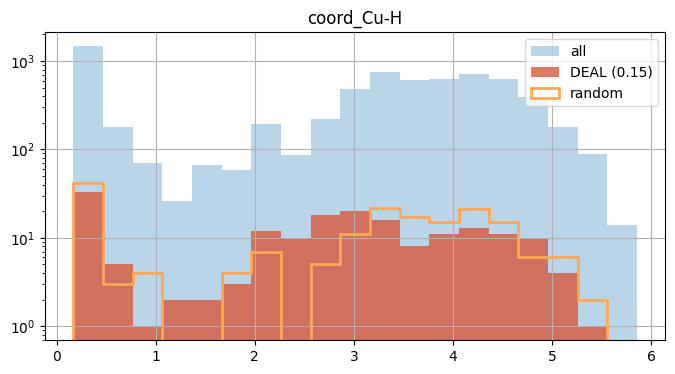

In [85]:
fig,ax = plt.subplots(figsize=(8,4))

cv = 'coord_Cu-H'

bins = np.linspace(colvar[cv].min(),colvar[cv].max(),20)
colvar.hist(cv,bins=bins,ax=ax,alpha=0.3,label='all')
colvar[sel].hist(cv,bins=bins,ax=ax,alpha=0.8,color='fessa6',label=f'DEAL ({threshold})')
colvar.sample(n=(sel==1).sum(),random_state=42).hist(cv,bins=bins,ax=ax,alpha=1,color='fessa5',linewidth=2,label='random',histtype='step')

ax.set_yscale('log')
ax.legend()

## View selected structures with chemiscope

Create chemiscope file if not already created

In [ ]:
from deal.utils import create_chemiscope_input

threshold = 0.15
traj_path = f'deal_{threshold}_selected.xyz'

chemiscope_input = create_chemiscope_input(trajectory = traj_path,
                                           colvar = f"../colvar/COLVAR",
                                           cvs = ['frame','energy','colvar.*'], # '*'
                                           filename = f'deal_{threshold}_chemiscope.json.gz',
                                           verbose = True)

[INFO] Creating Chemiscope input file...
[INFO] Reading file: deal_0.2_selected.xyz
[INFO] CV names: ['frame', 'energy', 'colvar.time', 'colvar.coord_Cu-O', 'colvar.coord_Cu-C', 'colvar.coord_Cu-H', 'colvar.coord_O-C', 'colvar.coord_O-H', 'colvar.coord_C-H', 'colvar.walker']
[INFO] "target_atoms" found in atoms.
[OUTPUT] Chemiscope input saved in: deal_0.2_chemiscope.json.gz


Visualize inside the notebook or upload the created file to https://chemiscope.org/

In [ ]:
import chemiscope

chemiscope.show_input(f'deal_{threshold}_chemiscope.json.gz')


<ChemiscopeWidget(meta={'name': 'DEAL selection'}, settings={'structure': [{'atoms': False, 'bonds': False, 's…